Nama: Filbert Naldo Wijaya

NIM: 2702235696

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data

train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive analysis of age

train_df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Insight: Rata-rata usia penumpang kapal Titanic adalah 29.7 tahun, dengan range dari 0.42 sampai 80 tahun.

In [ ]:
# calculate the survival count and percentage by gender using cross tabulation

survive_by_gender = train_df.groupby(["Sex", "Survived"]).size().reset_index(name="Count")

gender_count = train_df["Sex"].value_counts()

survival_percentage = survive_by_gender[survive_by_gender["Survived"] == 1].set_index("Sex")["Count"] / gender_count * 100
survival_percentage = survival_percentage.map(lambda x: f"{round(x, 3)} %")

print("Survival Count by Gender:\n", survive_by_gender)
print("\nSurvival Rate by Gender:\n", survival_percentage)

Survival Count by Gender:
       Sex  Survived  Count
0  female         0     81
1  female         1    233
2    male         0    468
3    male         1    109

Survival Rate by Gender:
 Sex
female    74.204 %
male      18.891 %
dtype: object


Insight:
Penumpang dengan gender perempuan mempunyai persentase survive lebih tinggi yaitu sebesar 74.204 %, daripada laki-laki yaitu hanya sebesar 18.891 %.

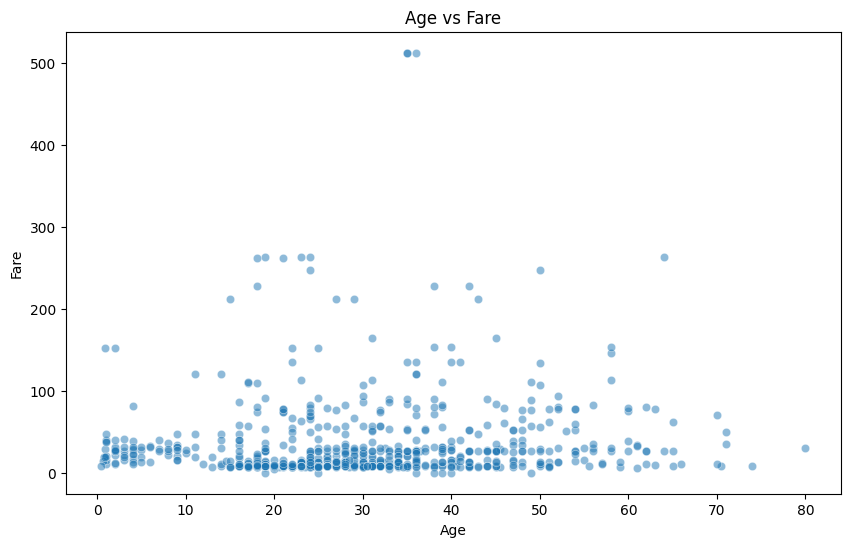

In [ ]:
# Scatterplot to see is there any correlation between age and fare

plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df["Age"], y=train_df["Fare"], alpha=0.5)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

Insight:

Mayoritas fare yang dibayar oleh penumpang tergolong rendah.

Terdapat outlier pada fare, di mana terdapat penumpang  membayar fare yang sangat mahal

Berdasarkan scatterplot, tidak ada korelasi/hubungan antara usia dan fare. Fare terdistribusi secara random tanpa memandang usia penumpang.


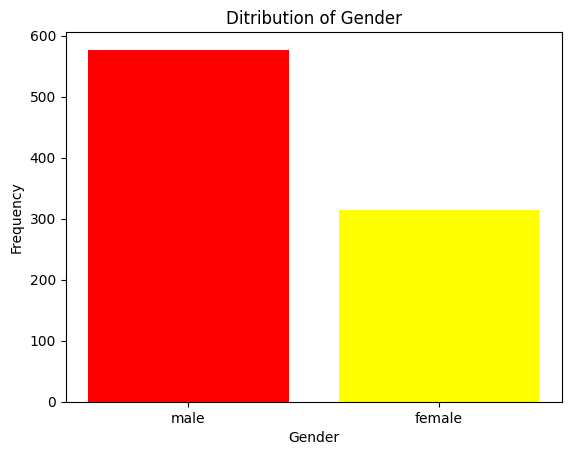

In [ ]:
# Show the distribution of gender

gender_counts = train_df['Sex'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['red', 'yellow'])
plt.title("Ditribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

Insight: Mayoritas penumpang kapal Titanic adalah laki-laki.

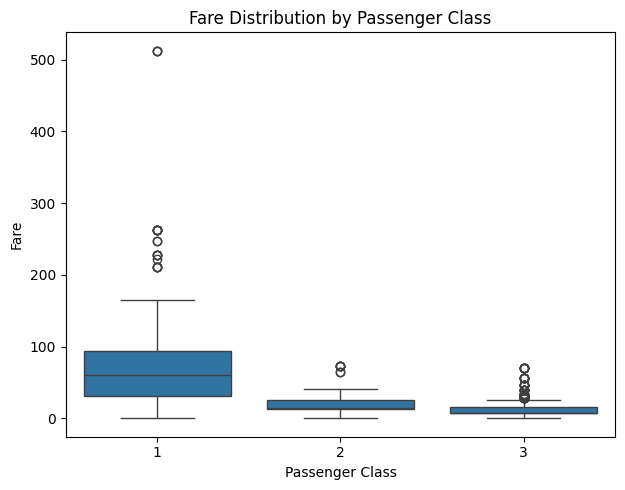

In [ ]:
# Boxplot of fare grouped by passenger class

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

Insight:

Median fare dari class 1 (First Class) jauh lebih tinggi dari 2 kelas lainnya. Hal ini menunjukkan adanya perbedaan yang jelas dalam ticket pricing.

Class 1 mempunyai IQR yang lumayan besar. Artinya harga tiket di class 1 sangat bervariasi. Berbeda dengan class 2 dan 3 yang IQRnya lumayan kecil, artinya pada class 2 dan 3 variasi harga tiketnya lebih sedikit.

Tiap class mempunyai outlier, artinya ada penumpang yang membayar fare dengan harga di atas standar per class. Class 1 mempunyai outlier yang sangat tinggi/jauh, artinya ada penumpang class 1 yang membayar fare sangat mahal.

# Data Preprocessing

In [ ]:
# check data train

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check data test

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
# check sum of missing values for each column in train data

train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# check sum of missing values for each column in test data

test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
# check if there is duplicate values in train data

train_df.duplicated().sum()

0

In [ ]:
# describe data

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Cleaning

In [ ]:
# filling missing values in column 'Age' using median

train_df['Age'] = train_df['Age'].fillna(value=train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(value=test_df['Age'].median())

In [ ]:
# filling missing values in column 'Cabin' by filling them with value 'Unknown'

train_df['Cabin'] = train_df['Cabin'].fillna(value="Unknown")
test_df['Cabin'] = test_df['Cabin'].fillna(value="Unknown")

In [ ]:
# filling missing values in column 'Embarked' using mode (modus)

train_df['Embarked'] = train_df['Embarked'].fillna(value=train_df["Embarked"].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(value=test_df["Embarked"].mode()[0])

In [ ]:
# filling missing values in column 'Fare' using mean

test_df['Fare'] = test_df['Fare'].fillna(value=test_df["Fare"].mean())

In [ ]:
train_df.info() # no missing values already

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info() # no missing values already

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Perform Encoding on Categorical Features

In [ ]:
# encode 'Sex' column
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})

Untuk 'Sex' saya menggunakan Label Encoding, karena 'Sex' hanya punya 2 kategori (binary) yaitu male dan female sehingga bisa encode dengan 2 value yaitu 0 dan 1.

In [ ]:
# encode 'Embarked' column
train_df["Embarked_Q"] = (train_df["Embarked"] == "Q").astype(int)
train_df["Embarked_S"] = (train_df["Embarked"] == "S").astype(int)
train_df.drop(columns=["Embarked"], inplace=True)

test_df["Embarked_Q"] = (test_df["Embarked"] == "Q").astype(int)
test_df["Embarked_S"] = (test_df["Embarked"] == "S").astype(int)
test_df.drop(columns=["Embarked"], inplace=True)

Untuk 'Embarked' saya menggunakan One-Hot Encoding karena column ini mempunyai 3 unique categorical value yaitu C, Q, dan S di mana 3 value ini tidak ada order/rank tertentu (tidak ada port yang paling bagus/paling buruk).

In [ ]:
train_df # after encoding

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,Unknown,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,Unknown,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,0


In [ ]:
test_df # after encoding

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Unknown,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,Unknown,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Unknown,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,Unknown,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,Unknown,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,0,1
416,1308,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,Unknown,0,1


Normalization/Standardization

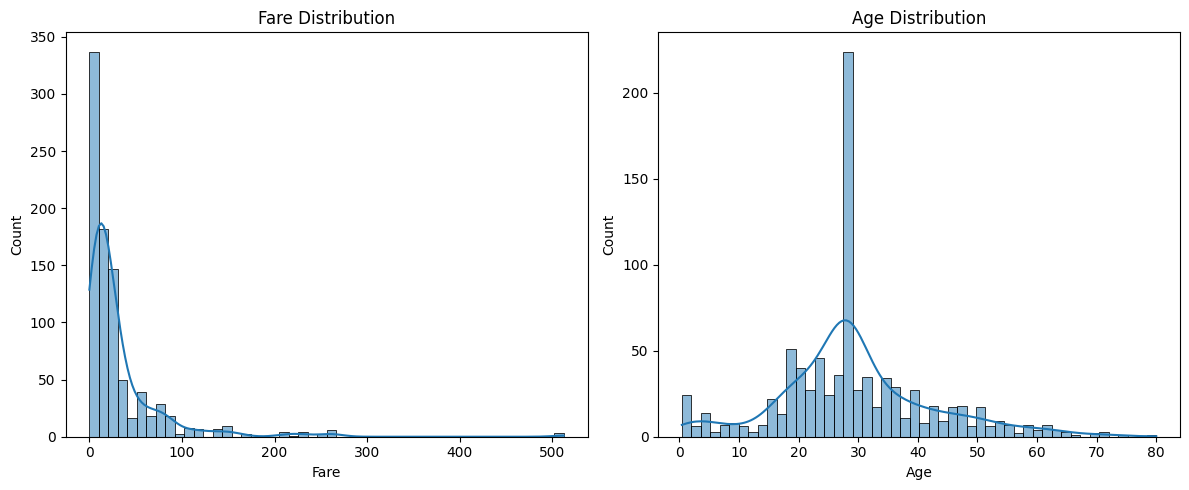

In [ ]:
# Visualize 'Fare' and 'Age' distribution

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Fare Distribution
sns.histplot(train_df["Fare"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Fare Distribution")

# Age Distribution
sns.histplot(train_df["Age"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Age Distribution")

plt.tight_layout()
plt.show()

Fare: right skewed distribution dan ada outlier yang sangat jauh/besar, maka terapkan MinMax Normalization

Age: Normal distribution, maka terapkan Z-Score Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalize 'Fare'
scaler_fare = MinMaxScaler()
train_df["Fare"] = scaler_fare.fit_transform(train_df[["Fare"]])
test_df["Fare"] = scaler_fare.fit_transform(test_df[["Fare"]])

# Standardize 'Age'
scaler_age = StandardScaler()
train_df["Age"] = scaler_age.fit_transform(train_df[["Age"]])
test_df["Age"] = scaler_age.fit_transform(test_df[["Age"]])

In [ ]:
train_df # after normalization/standardization

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,0.014151,Unknown,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,1,0,PC 17599,0.139136,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,0.015469,Unknown,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.103644,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,0.015713,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,-0.181487,0,0,211536,0.025374,Unknown,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,-0.796286,0,0,112053,0.058556,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,-0.104637,1,2,W./C. 6607,0.045771,Unknown,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,-0.258337,0,0,111369,0.058556,C148,0,0


In [ ]:
test_df # after normalization/standardization

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,0.386231,0,0,330911,0.015282,Unknown,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.371370,1,0,363272,0.013663,Unknown,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,2.553537,0,0,240276,0.018909,Unknown,1,0
3,895,3,"Wirz, Mr. Albert",0,-0.204852,0,0,315154,0.016908,Unknown,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.598908,1,1,3101298,0.023984,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,-0.204852,0,0,A.5. 3236,0.015713,Unknown,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0.740881,0,0,PC 17758,0.212559,C105,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0.701476,0,0,SOTON/O.Q. 3101262,0.014151,Unknown,0,1
416,1308,3,"Ware, Mr. Frederick",0,-0.204852,0,0,359309,0.015713,Unknown,0,1


## Additional

Data Reduction

In [ ]:
train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [ ]:
train_df # final data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,0.014151,0,1
1,1,1,1,0.663861,1,0,0.139136,0,0
2,1,3,1,-0.258337,0,0,0.015469,0,1
3,1,1,1,0.433312,1,0,0.103644,0,1
4,0,3,0,0.433312,0,0,0.015713,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.181487,0,0,0.025374,0,1
887,1,1,1,-0.796286,0,0,0.058556,0,1
888,0,3,1,-0.104637,1,2,0.045771,0,1
889,1,1,0,-0.258337,0,0,0.058556,0,0


In [ ]:
test_df # final data, but there is no 'Survived' column as Target, so cant be used as test data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,0.386231,0,0,0.015282,1,0
1,3,1,1.371370,1,0,0.013663,0,1
2,2,0,2.553537,0,0,0.018909,1,0
3,3,0,-0.204852,0,0,0.016908,0,1
4,3,1,-0.598908,1,1,0.023984,0,1
...,...,...,...,...,...,...,...,...
413,3,0,-0.204852,0,0,0.015713,0,1
414,1,1,0.740881,0,0,0.212559,0,0
415,3,0,0.701476,0,0,0.014151,0,1
416,3,0,-0.204852,0,0,0.015713,0,1


# Model

## Base Gaussian Naive Bayes

In [ ]:
# only use train data, split it 70:30

from sklearn.model_selection import train_test_split

X = train_df.drop(columns=["Survived"])
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(f"Test accuracy: {model.score(X_test, y_test)}")
print(f"Train accuracy: {model.score(X_train, y_train)}")

Test accuracy: 0.7947761194029851
Train accuracy: 0.7929373996789727


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.75      0.75      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  columns = ["Predicted Positive", "Predicted Negative"],
                  index = ["Actual Positive", "Actual Negative"])

df

,Predicted Positive,Predicted Negative
Actual Positive,130,27
Actual Negative,28,83


Sebanyak 130 orang diprediksi survive, dan aslinya memang survive.

Sebanyak 83 orang diprediksi tidak survive, dan aslinya memang tidak survive.

Sebanyak 27 orang diprediksi tidak survive, tetapi aslinya  survive.

Sebanyak 28 orang diprediksi survive, tetapi aslinya tidak survive.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.7947761194029851
Precision: 0.7545454545454545
Recall: 0.7477477477477478
F1 Score: 0.751131221719457


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print(f"Cross-validation score: {cv_scores.mean()}")

Cross-validation score: 0.7811610486891386


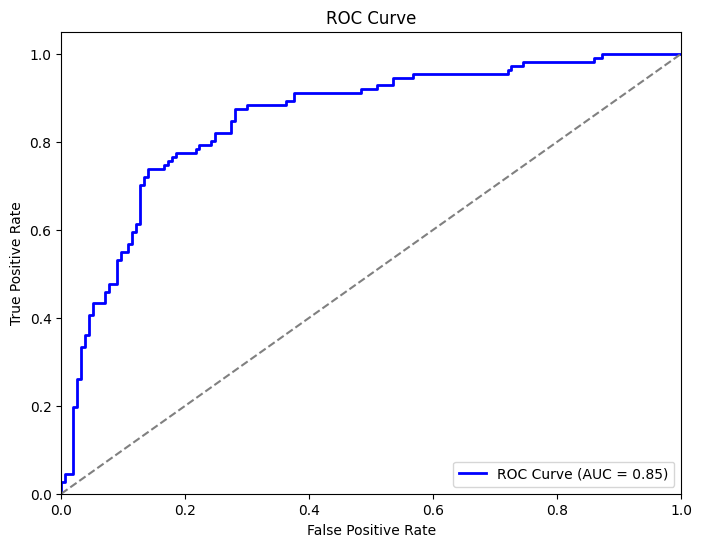

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Berdasarkan hasil evaluasi, model dapat dikatakan lumayan baik dalam memprediksi apakah penumpang kapal titanic selamat atau tidak, hal ini bisa dilihat dari kurva ROC di mana kurva condong ke kiri atas.

Score AUC yang dihasilkan yaitu 0.85 dan acurracy-nya yaitu 79.5%, artinya model dapat memprediksi dengan cukup tepat.


## SMOTE Method

In [ ]:
# only use train data, split it 70:30

from sklearn.model_selection import train_test_split

X = train_df.drop(columns=["Survived"])
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))

Before SMOTE: Counter({0: 392, 1: 231})


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train) # hanya apply SMOTE di training data saja, karena testing data harus mencerminkan real world data yang naturalnya bisa tidak balance

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("After SMOTE:", Counter(y_train))

After SMOTE: Counter({1: 392, 0: 392})


In [ ]:
print(f"Test accuracy: {model.score(X_test, y_test)}")
print(f"Train accuracy: {model.score(X_train, y_train)}")

Test accuracy: 0.7910447761194029
Train accuracy: 0.7691326530612245


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       157
           1       0.72      0.80      0.76       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.79      0.79       268



In [ ]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  columns = ["Predicted Positive", "Predicted Negative"],
                  index = ["Actual Positive", "Actual Negative"])

df

,Predicted Positive,Predicted Negative
Actual Positive,123,34
Actual Negative,22,89


Sebanyak 123 orang diprediksi survive, dan aslinya memang survive.

Sebanyak 89 orang diprediksi tidak survive, dan aslinya memang tidak survive.

Sebanyak 34 orang diprediksi tidak survive, tetapi aslinya survive.

Sebanyak 22 orang diprediksi survive, tetapi aslinya tidak survive.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.7910447761194029
Precision: 0.7235772357723578
Recall: 0.8018018018018018
F1 Score: 0.7606837606837606


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print(f"Cross-validation score: {cv_scores.mean()}")

Cross-validation score: 0.7811610486891386


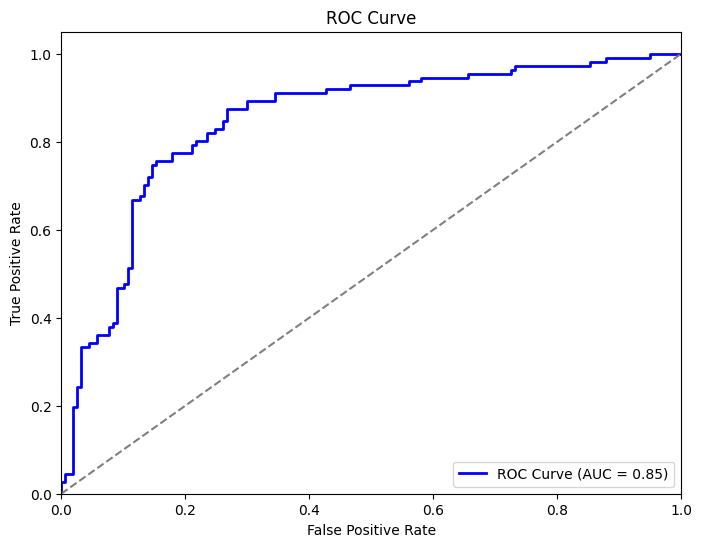

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Berdasarkan hasil evaluasi, model dapat dikatakan lumayan baik dalam memprediksi apakah penumpang kapal titanic selamat atau tidak, hal ini bisa dilihat dari kurva ROC di mana kurva condong ke kiri atas.

Score AUC yang dihasilkan yaitu 0.85 dan acurracy-nya yaitu 79.1%, artinya model dapat memprediksi dengan cukup tepat.

## Hyperparameter Tuning using Grid Search (Best Model)

In [ ]:
# only use train data, split it 70:30

from sklearn.model_selection import train_test_split

X = train_df.drop(columns=["Survived"])
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Use grid search to find the best param

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'var_smoothing': 1e-09}
Best accuracy: 0.7880184331797235


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
print(f"Test accuracy: {grid_search.best_estimator_.score(X_test, y_test)}")
print(f"Train accuracy: {grid_search.best_estimator_.score(X_train, y_train)}")

Test accuracy: 0.7947761194029851
Train accuracy: 0.7929373996789727


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.75      0.75      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  columns = ["Predicted Positive", "Predicted Negative"],
                  index = ["Actual Positive", "Actual Negative"])

df

,Predicted Positive,Predicted Negative
Actual Positive,130,27
Actual Negative,28,83


Sebanyak 130 orang diprediksi survive, dan aslinya memang survive.

Sebanyak 83 orang diprediksi tidak survive, dan aslinya memang tidak survive.

Sebanyak 27 orang diprediksi tidak survive, tetapi aslinya  survive.

Sebanyak 28 orang diprediksi survive, tetapi aslinya tidak survive.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.7947761194029851
Precision: 0.7545454545454545
Recall: 0.7477477477477478
F1 Score: 0.751131221719457


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring='accuracy')

print(f"Cross-validation score: {cv_scores.mean()}")

Cross-validation score: 0.7811610486891386


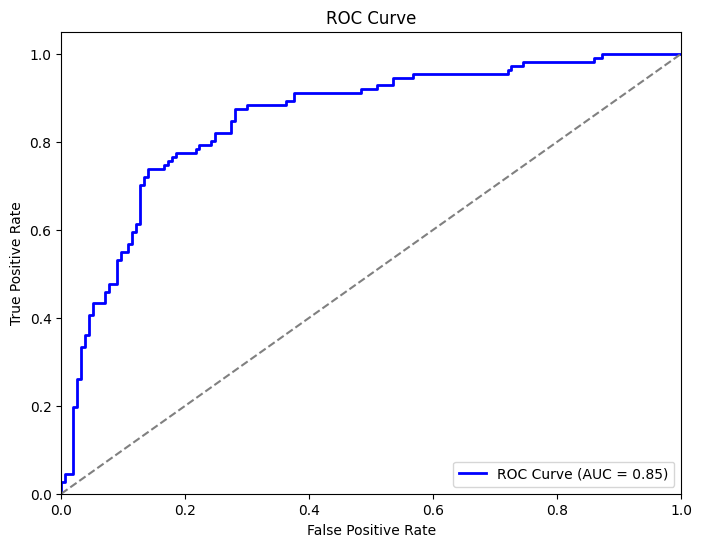

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Berdasarkan hasil evaluasi, model dapat dikatakan lumayan baik dalam memprediksi apakah penumpang kapal titanic selamat atau tidak, hal ini bisa dilihat dari kurva ROC di mana kurva condong ke kiri atas.

Score AUC yang dihasilkan yaitu 0.85 dan acurracy-nya yaitu 79.5%, artinya model dapat memprediksi dengan cukup tepat.
